In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
from collections import defaultdict
%matplotlib inline

# Project 1: Facebook Network Analysis

The Facebook network was obtained from the Stanford Large Network Dataset Collection http://snap.stanford.edu/data/ego-Facebook.html. This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using the Facebook app. The dataset includes node features (profiles), circles, and ego networks. Ego-centered networks are networks surrounding one particular individual, meaning, usually, the individual surveyed and his or her immediate contacts. The individual surveyed is referred to as the ego and the contacts as alters.

## 1. Introduction 

## Reading the Facebook Network 

In [2]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [3]:
fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())

In [4]:
n, m

(4039, 88234)

In [5]:
print(nx.info(fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


The network has 4039 nodes and 88234 edges. This network is undirected. This checks with the dataset statistics obtained at the referred website.

## Visualizing the Facebook Network 

The Facebook network is a large undirected network. Therefore, visual representations are not sufficient for the study of such a network. Further measurements and techniques should be applied in order to obtain insight about the intrinsic characteristics of the network. Nevertheless, in this section we present an ego graph for the main hub, i.e., we plot a graph which has at its center the node with the largest degree and its connections (links) to other nodes of the network. 

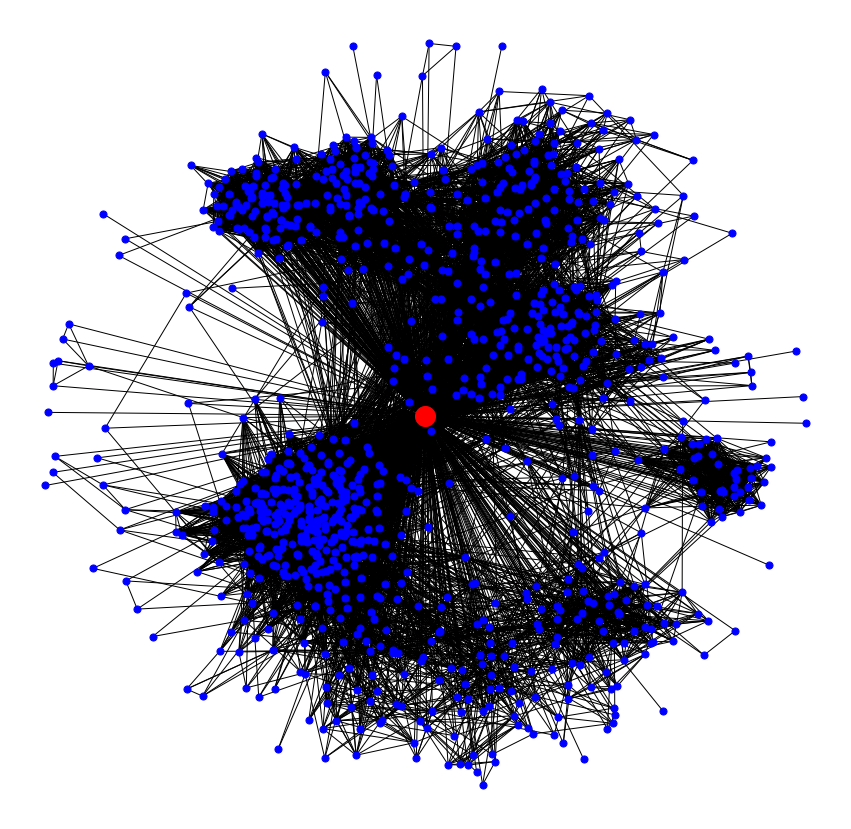

In [6]:
# Ego graph plotting in the center the ego and its alters

# find node with largest degree
node_and_degree = fb.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(fb, largest_hub)

# Some matplotlib options
plt.figure(figsize=(15,15))
plt.axis('off')

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 400, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

In [7]:
# List of the 10 nodes with the largest degree in the network
sorted(list(fb.degree()), key=lambda x:x[1], reverse=True)[:10]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254),
 (1800, 245),
 (1663, 235)]

## 2. Results and Discussion 

The results obtained from the analysis of the network and subsequent discussion are presented throughout this section. Each computed metric will be interpreted and its relevance to the network will be discussed.

## 2.1. Global characterization of the network 

### Average Degree

In [8]:
# Sum the degree of all nodes and divide by the total number of nodes of the network
def average_degree(graph):
    degree_sum = 0
    for node in graph.nodes():
        degree_sum = degree_sum + graph.degree(node)
    return degree_sum / len(graph.nodes())

In [9]:
average_degree(fb)

43.69101262688784

### Degree Distribution

In [10]:
# Function that returns a list with the degree of each node
def degree_list(graph):
    list_degree = [];
    for node in graph.nodes():
        list_degree = list_degree + [graph.degree(node)]
    return list_degree

In [11]:
#sorted(set(degree_list(fb))) # different degrees that the nodes of this network have

In [12]:
def plot_degree_dist(graph):
    all_degrees = degree_list(graph); # list with all the degrees for each node
    unique_degrees = list(set(all_degrees)); # list with the possible degree values nodes can take
    
    number_nodes_degree_i = []; # list to get the number of nodes that have a determined degree
    for i in unique_degrees:
        x = all_degrees.count(i);
        number_nodes_degree_i = number_nodes_degree_i + [x];
    
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(unique_degrees, number_nodes_degree_i, 'ro')
    plt.xticks(range(0,1100,50))
    plt.yticks(range(0,125,10))
    plt.xlabel('Degree ($k$)')
    plt.ylabel('Number of nodes with degree k')
    plt.title('Degree Distribution of the Facebook Network')
    plt.show()

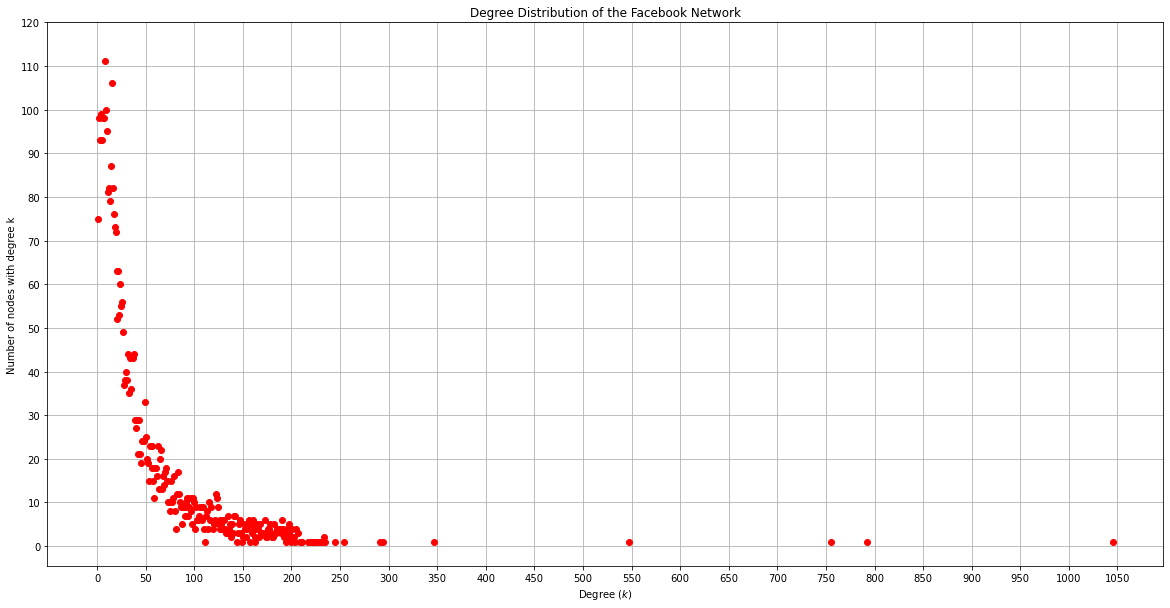

In [13]:
plot_degree_dist(fb)

In [14]:
def plot_degree_dist_log(graph):
    all_degrees = degree_list(graph); # list with all the degrees for each node
    unique_degrees = list(set(all_degrees)); # list with the possible degree values nodes can take
    
    number_nodes_degree_i = []; # list to get the number of nodes that have a determined degree
    for i in unique_degrees:
        x = all_degrees.count(i);
        number_nodes_degree_i = number_nodes_degree_i + [x/len(graph.nodes())];
    
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(unique_degrees, number_nodes_degree_i, 'ro')
    plt.xticks([pow(10,0), pow(10,1), pow(10,2), pow(10,3)])
    plt.yticks([pow(10,-4), pow(10,-3), pow(10,-2), pow(10,-1)])
    plt.rcParams.update({'font.size': 20})
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$log_{10}(k)$', fontsize = 25)
    plt.ylabel('$log_{10}(p_k)$', fontsize = 25)
    plt.title('Degree Distribution of Facebook Network (Logarithmic scale)')
    #plt.savefig('degree_dist.png')
    plt.show()

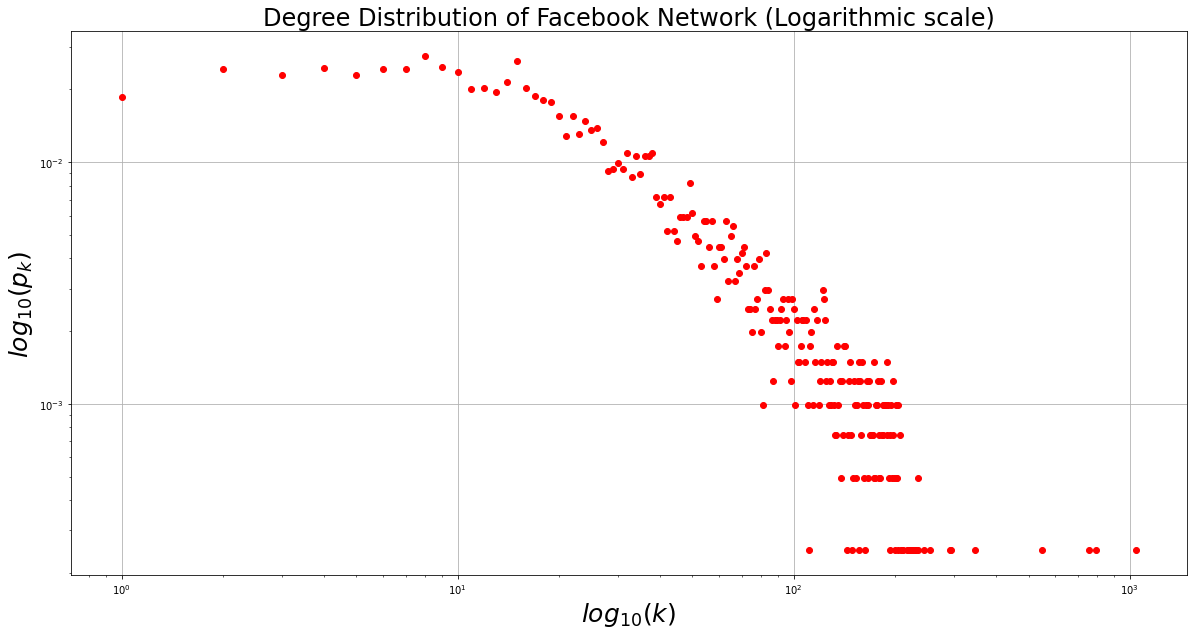

In [15]:
plot_degree_dist_log(fb)

In [16]:
def number_nodes_degree_i(graph):
    all_degrees = degree_list(graph); # list with all the degrees for each node
    unique_degrees = list(set(all_degrees)); # list with the possible degree values nodes can take
    
    number_nodes_degree_i = []; # list to get the number of nodes that have a determined degree
    for i in unique_degrees:
        x = all_degrees.count(i);
        number_nodes_degree_i = number_nodes_degree_i + [x/len(graph.nodes())]; # /len(graph.nodes())
    return number_nodes_degree_i

In [17]:
def cum_sum(graph):
    all_degrees = degree_list(graph); # list with all the degrees for each node
    unique_degrees = list(set(all_degrees)); # list with the possible degree values nodes can take
    
    number_nodes_degree_i = []; # list to get the number of nodes that have a determined degree
    for i in unique_degrees:
        x = all_degrees.count(i);
        number_nodes_degree_i = number_nodes_degree_i + [x/len(graph.nodes())]; #/len(graph.nodes())
           
    cum_number_nodes = [number_nodes_degree_i[0]];
    k = 0;
    for i in number_nodes_degree_i[1:]:
        cum_number_nodes = cum_number_nodes + [cum_number_nodes[k] + i];
        k = k + 1;
    return cum_number_nodes

In [18]:
# Function that returns 1 - CDF, it is the CCDF
def comp_cum_sum(graph):
    comp_nodes = [];
    for i in cum_sum(graph):
        comp_nodes = comp_nodes + [1-i];
    return comp_nodes

In [19]:
def plot_degree_dist_cum(graph):
    all_degrees = degree_list(graph); # list with all the degrees for each node
    unique_degrees = list(set(all_degrees)); # list with the possible degree values nodes can take
    
    number_nodes_degree_i = []; # list to get the number of nodes that have a determined degree
    for i in unique_degrees:
        x = all_degrees.count(i);
        number_nodes_degree_i = number_nodes_degree_i + [x/len(graph.nodes())];
        
    cum_number_nodes = [number_nodes_degree_i[0]];
    k = 0;
    for i in number_nodes_degree_i[1:]:
        cum_number_nodes = cum_number_nodes + [cum_number_nodes[k] + i];
        k = k + 1;
    
    comp_nodes = [];
    for i in cum_number_nodes:
        comp_nodes = comp_nodes + [1-i];  #I am using the complementary CDF; Is this correct?
    
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(unique_degrees, comp_nodes, 'ro')
    plt.xticks([pow(10,0), pow(10,1), pow(10,2), pow(10,3)])
    plt.yticks([pow(10,-4), pow(10,-3), pow(10,-2), pow(10,-1)])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Probability of having a node with degree larger than k')
    plt.title('Complementary Cumulative Degree Distribution of Facebook Network')
    plt.show()

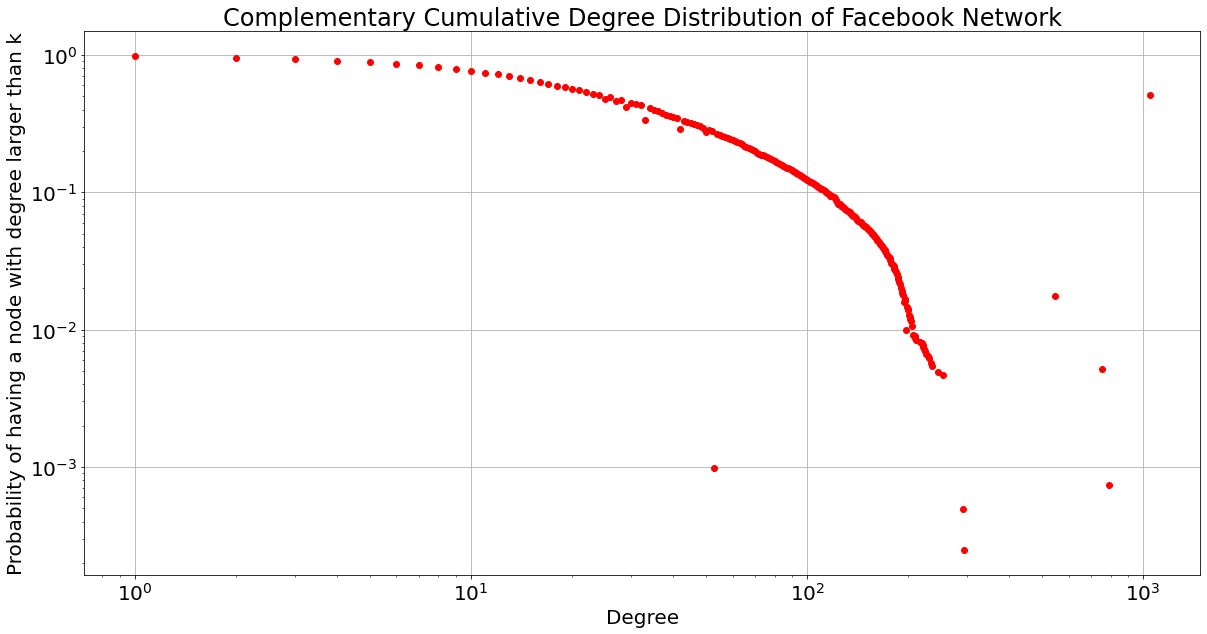

In [20]:
plot_degree_dist_cum(fb)

##### Fitting a Power Law to the Degree Distribution 

In [21]:
! pip install powerlaw

In [22]:
import powerlaw
print(powerlaw.__version__)
%pylab inline

1.4.4
Populating the interactive namespace from numpy and matplotlib


In [23]:
# Commands to obtain the power lae distribution that best fits the data
fit = powerlaw.Fit(number_nodes_degree_i(fb))
fit.power_law.alpha # sum 1 to the value obtained for alpha since we are working with the CDF
print(fit.power_law.alpha)
print(fit.power_law.sigma)

1.8126478275905782
0.06326454757544205


Calculating best minimal value for power law fit
D:\Anaconda\envs\NetworkX\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


Calculating best minimal value for power law fit
D:\Anaconda\envs\NetworkX\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


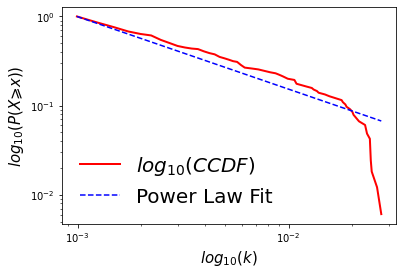

In [24]:
fit = powerlaw.Fit(number_nodes_degree_i(fb))

fig = fit.plot_ccdf(color='r', linewidth=2, label = r"$log_{10}(CCDF)$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=fig, label=r"Power Law Fit")
###
fig.set_ylabel(u"$log_{10}(P(X \geqslant x))$", fontsize = 15)
fig.set_xlabel(r"$log_{10}(k)$", fontsize = 15)
handles, labels = fig.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc=3, fontsize = 20, markerscale = 15)
#leg.markerscale(2)
leg.draw_frame(False)
###
#savefig('powerlaw_dist.png', bbox_inches='tight')

### Clustering Coefficient 

In [25]:
# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients = nx.clustering(fb)

In [26]:
# Clustering coefficient of the node with highest number of links
clust_coefficients[107]

0.049038479165520905

In [27]:
# List of the 10 nodes with the largest clustering coefficient
sorted(list(clust_coefficients.items()), key=lambda x:x[1])[:80]

[(11, 0),
 (12, 0),
 (15, 0),
 (18, 0),
 (37, 0),
 (43, 0),
 (74, 0),
 (114, 0),
 (209, 0),
 (210, 0),
 (215, 0),
 (287, 0),
 (292, 0),
 (335, 0),
 (911, 0),
 (918, 0),
 (1096, 0),
 (1119, 0),
 (1145, 0),
 (1206, 0),
 (1386, 0),
 (1466, 0),
 (1560, 0),
 (1581, 0),
 (1834, 0),
 (358, 0),
 (447, 0),
 (550, 0),
 (585, 0),
 (602, 0),
 (607, 0),
 (608, 0),
 (613, 0),
 (624, 0),
 (638, 0),
 (668, 0),
 (674, 0),
 (692, 0),
 (801, 0),
 (860, 0),
 (875, 0),
 (883, 0),
 (891, 0),
 (892, 0),
 (2842, 0),
 (3031, 0),
 (3071, 0),
 (3183, 0),
 (3230, 0),
 (2079, 0),
 (2195, 0),
 (2269, 0),
 (2457, 0),
 (2470, 0),
 (2569, 0),
 (2596, 0),
 (3451, 0),
 (3453, 0),
 (3570, 0),
 (3650, 0),
 (3709, 0),
 (3729, 0),
 (3748, 0),
 (3798, 0),
 (3820, 0),
 (3853, 0),
 (3856, 0),
 (3935, 0),
 (3974, 0),
 (3984, 0),
 (4008, 0),
 (4010, 0),
 (4015, 0),
 (4022, 0),
 (4024, 0),
 (4035, 0),
 (3437, 0.032230414314509376),
 (0, 0.04196165314587463),
 (1684, 0.044774546986936364),
 (107, 0.049038479165520905)]

In [28]:
# Average clustering coefficient
avg_clust = sum(list(clust_coefficients.values())) / len(clust_coefficients)
avg_clust

0.6055467186200862

In [29]:
# Average clustering coefficient
nx.average_clustering(fb)

0.6055467186200876

In [30]:
# Get the average clustering coefficient for a given value of the degree
d = defaultdict(list)

for u in fb.nodes():
   d[fb.degree(u)].append(u)

for degree in d:
   clustering_coeff = nx.clustering(fb, d[degree])
   print(degree, sum(list(clustering_coeff.values()))/len(clustering_coeff))

347 0.04196165314587463
17 0.6208397832817338
10 0.6570760233918129
13 0.5957481337228171
6 0.7333333333333333
20 0.562406015037594
8 0.7191119691119692
57 0.4696523918491881
1 0.0
31 0.5106960950764006
15 0.636837376460018
9 0.6930555555555555
16 0.6235772357723578
65 0.506298076923077
11 0.679685746352413
69 0.48998294970161965
68 0.49862818261633013
5 0.7752688172043013
23 0.5863226191364009
2 0.9897959183673469
44 0.5212423235679049
24 0.5881642512077294
12 0.6182557280118255
22 0.568267711124854
4 0.8282828282828284
7 0.7478134110787171
78 0.49492931311113125
19 0.576591942820013
3 0.878136200716846
26 0.5358791208791208
76 0.5301988304093567
14 0.6113426803081975
34 0.5566471831861708
21 0.5502747252747253
49 0.571866625438054
32 0.5364736070381231
1045 0.049038479165520905
37 0.5037362944339687
40 0.5243589743589744
36 0.5407530454042083
62 0.49851269169751455
63 0.4748770008237047
18 0.6267347121497001
28 0.5313885313885315
133 0.4766081871345029
43 0.4884102799098789
25 0.5545

In [31]:
def plot_clust_coef(graph):
    
    # Get the average clustering coefficient for a given value of the degree
    d = defaultdict(list)

    for u in graph.nodes():
       d[graph.degree(u)].append(u)
    
    deg = [];
    for i in d.items():
        deg = deg + [i[0]];

    clust_coef_i = [];
    for degree in d:
        clustering_coeff = nx.clustering(graph, d[degree])
        clust_coef_i = clust_coef_i + [sum(list(clustering_coeff.values()))/len(clustering_coeff)];
    
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(deg, clust_coef_i, 'ro')
    plt.rcParams.update({'font.size': 20})
    #plt.xticks(range(0,1150,100))
    #plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('$log_{10}(k)$', fontsize = 25)
    plt.ylabel('Average local clustering coefficient, $C_i$', fontsize = 25)
    #plt.title('Degree Distribution of the Facebook Network')
    plt.savefig('avg_clust.png')
    plt.show()

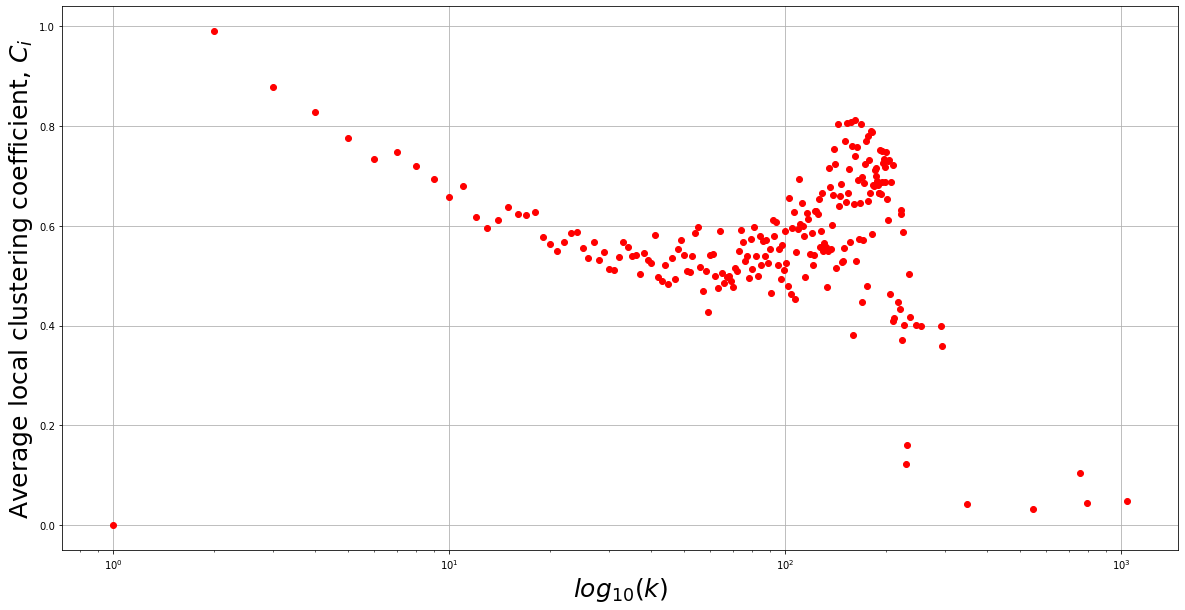

In [32]:
plot_clust_coef(fb)

### Average Path Length 

In [33]:
nx.average_shortest_path_length(fb)

3.6925068496963913

## 2.2. Centrality measures

Centrality measures are answers to the question "What characterizes an important vertex?". The word "importance" has a wide number of meanings, leading to many different definitions of centrality.

### Degree Centrality 

The degree of a node is the number of other nodes to which it is connected.
NetworkX's degree centrality is calculated by taking the degree of the node and dividing by ``n-1`` where where ``n`` is the number of nodes in ``G``.

In [34]:
degree_centrality = nx.degree_centrality(fb)
degree_centrality

{0: 0.08593363051015354,
 1: 0.004210004952947003,
 2: 0.0024764735017335313,
 3: 0.004210004952947003,
 4: 0.0024764735017335313,
 5: 0.0032194155522535907,
 6: 0.0014858841010401188,
 7: 0.004952947003467063,
 8: 0.001981178801386825,
 9: 0.014115898959881128,
 10: 0.0024764735017335313,
 11: 0.00024764735017335313,
 12: 0.00024764735017335313,
 13: 0.007677067855373947,
 14: 0.003714710252600297,
 15: 0.00024764735017335313,
 16: 0.002228826151560178,
 17: 0.0032194155522535907,
 18: 0.00024764735017335313,
 19: 0.00396235760277365,
 20: 0.003714710252600297,
 21: 0.016097077761267953,
 22: 0.0027241208519068845,
 23: 0.004210004952947003,
 24: 0.00396235760277365,
 25: 0.017087667161961365,
 26: 0.016840019811788013,
 27: 0.0012382367508667657,
 28: 0.0032194155522535907,
 29: 0.0032194155522535907,
 30: 0.004210004952947003,
 31: 0.005695889053987122,
 32: 0.0014858841010401188,
 33: 0.0004952947003467063,
 34: 0.0012382367508667657,
 35: 0.0004952947003467063,
 36: 0.002724120851

In [35]:
# Top 5.  
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354)]

A disaddvantage of degree centrality is that it only captures relationships of their near neighbours, it doesn't capture anything else about their contacts with the remaining network.

### Closeness Centrality 

Closeness Centrality measures how many "hops" it would take to reach every other node in a network (taking the shortest path). It can be informally thought as 'average distance' to all other nodes.

##### Why should we care about closeness centrality?

Degree centrality measures might be criticized because they only take into account the immediate ties that a node has, or the ties of the node's neighbors, rather than indirect ties to all others. One node might be tied to a large number of others, but those others might be rather disconnected from the network as a whole. In a case like this, the node could be quite central, but only in a local neighborhood.

In [36]:
closeness_centrality = nx.closeness_centrality(fb)
closeness_centrality

{0: 0.35334266713335666,
 1: 0.2613761408505405,
 2: 0.26125776397515527,
 3: 0.2613761408505405,
 4: 0.26125776397515527,
 5: 0.2613084837895554,
 6: 0.26119016817593793,
 7: 0.2747686445291236,
 8: 0.2612239617026782,
 9: 0.2620546433902265,
 10: 0.26125776397515527,
 11: 0.26110572259941806,
 12: 0.26110572259941806,
 13: 0.26161321671525756,
 14: 0.2613423079412336,
 15: 0.26110572259941806,
 16: 0.2612408617454875,
 17: 0.2613084837895554,
 18: 0.26110572259941806,
 19: 0.2613592233009709,
 20: 0.2613423079412336,
 21: 0.2756125861715924,
 22: 0.2612746683921061,
 23: 0.2613761408505405,
 24: 0.2613592233009709,
 25: 0.26225888160031174,
 26: 0.26224184959085595,
 27: 0.2611732746911584,
 28: 0.2613084837895554,
 29: 0.2613084837895554,
 30: 0.2613761408505405,
 31: 0.2614776921582594,
 32: 0.26119016817593793,
 33: 0.26112260734609416,
 34: 0.3033125516412529,
 35: 0.26112260734609416,
 36: 0.2612746683921061,
 37: 0.26110572259941806,
 38: 0.2612408617454875,
 39: 0.261342307941

In [37]:
# Top 5.  
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796)]

### Betweeness Centrality 

Betweenness centrality quantifies the number of times a node acts as a bridge (or "broker") along the shortest path between two other nodes.

In this conception, vertices that have a high probability to occur on a randomly chosen shortest path between two randomly chosen vertices have a high betweenness.

##### Why is betweeness centrality important?  

Suppose that I want to influence you by sending you information, or make a deal to exchange some resources. But, in order to talk to you, I must go through an intermediary. For example, let's suppose that I wanted to try to convince the Chancellor of my university to buy me a new computer. According to the rules of our bureaucratic hierarchy, I must forward my request through my department chair, a dean, and an executive vice chancellor. Each one of these people could delay the request, or even prevent my request from getting through. This gives the people who lie "between" me and the Chancellor power with respect to me... Having more than one channel makes me less dependent, and, in a sense, more powerful.

In [38]:
betweeness_centrality = nx.betweenness_centrality(fb)
betweeness_centrality

{0: 0.14630592147442917,
 1: 2.7832744209034606e-06,
 2: 7.595021178512074e-08,
 3: 1.6850656559280464e-06,
 4: 1.8403320547933104e-07,
 5: 2.205964164092193e-06,
 6: 2.4537760730577472e-08,
 7: 0.0001702984836730339,
 8: 2.7604980821899654e-07,
 9: 1.6454236303026905e-05,
 10: 4.986739552037655e-08,
 11: 0.0,
 12: 0.0,
 13: 1.7622717578436846e-06,
 14: 5.582871686568508e-07,
 15: 0.0,
 16: 1.9979459275532697e-07,
 17: 4.1066669000480344e-07,
 18: 0.0,
 19: 5.062957964075819e-06,
 20: 6.793693332142838e-07,
 21: 0.0009380243844653233,
 22: 6.703002200833232e-07,
 23: 6.860348937590618e-06,
 24: 1.3673472422981514e-07,
 25: 5.38808313945586e-05,
 26: 1.935436798204632e-05,
 27: 3.067220091322184e-08,
 28: 3.812160659244892e-07,
 29: 1.3954817951917517e-06,
 30: 1.3694627409316544e-06,
 31: 4.932641252790837e-06,
 32: 0.0,
 33: 0.0,
 34: 0.0036020881281963652,
 35: 0.0,
 36: 2.726417858953052e-08,
 37: 0.0,
 38: 7.344481172858835e-07,
 39: 9.548632622274015e-07,
 40: 1.3796059569123122e-

In [39]:
# top 5
sorted(betweeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306)]

### Eigenvector Centrality 

A node is high in eigenvector centrality if it is connected to many other nodes who are themselves well connected. Eigenvector centrality for each node is simply calculated as the proportional eigenvector values of the eigenvector with the largest eigenvalue.

In [40]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(fb)
eigenvector_centrality

{0: 3.313349648171539e-05,
 1: 5.970600698113629e-07,
 2: 2.165774698593417e-07,
 3: 6.55984327722964e-07,
 4: 2.1690663459579418e-07,
 5: 1.1760076670253655e-06,
 6: 2.1057324828228873e-07,
 7: 2.5672049814406463e-05,
 8: 2.1311884158405677e-07,
 9: 2.203199227630395e-06,
 10: 7.637201488974015e-07,
 11: 2.0405673474925022e-07,
 12: 2.0405673475118593e-07,
 13: 1.0949312268193685e-06,
 14: 2.2350467478161045e-07,
 15: 2.0405673474978967e-07,
 16: 2.548376936799063e-07,
 17: 2.2079962964902017e-07,
 18: 2.0405673475032304e-07,
 19: 2.2441266051870905e-07,
 20: 2.2334505867721173e-07,
 21: 2.5949241139569208e-05,
 22: 1.029402549894675e-06,
 23: 2.256797230661243e-07,
 24: 2.415974422966e-07,
 25: 2.0805065426034644e-06,
 26: 2.3218415030969186e-06,
 27: 3.7837353939169153e-07,
 28: 2.2069607147269166e-07,
 29: 2.856870779999394e-07,
 30: 9.552541190483517e-07,
 31: 1.4448436468076314e-06,
 32: 2.1073954755264288e-07,
 33: 2.0532123093679764e-07,
 34: 4.036949535502831e-06,
 35: 2.05403

In [41]:
max_value = max(eigenvector_centrality.items(), key=lambda x: x[1])

ec_scaled = {}
for k in eigenvector_centrality.keys():
    ec_scaled[k] = eigenvector_centrality[k] / max_value[1]

# Scaled by the most central node
sorted(ec_scaled.items(), key=lambda x:x[1], reverse=True)[0:5]

[(1912, 1.0),
 (2266, 0.9117190175727702),
 (2206, 0.9019626322184238),
 (2233, 0.8927488203018581),
 (2464, 0.8833723691600288)]

In [42]:
# top 15
sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:15]

[(1912, 0.09540586441269965),
 (2266, 0.08698334097302744),
 (2206, 0.08605252459475261),
 (2233, 0.08517347290431664),
 (2464, 0.08427890447800697),
 (2142, 0.08419319953090997),
 (2218, 0.0841558618870026),
 (2078, 0.08413629654279364),
 (2123, 0.08367154192111717),
 (1993, 0.08353255553330739),
 (2410, 0.0835176322335248),
 (2244, 0.08334198736801232),
 (2507, 0.08327324297424332),
 (2240, 0.0830569702370604),
 (2340, 0.08305348168609178)]

In [43]:
# bottom 15
sorted(eigenvector_centrality.items(), key=lambda x: x[1])[0:15]

[(801, 3.63459713892973e-14),
 (692, 3.63470790776066e-14),
 (749, 3.658565155901573e-14),
 (775, 3.658817971241566e-14),
 (841, 3.6642003847417465e-14),
 (699, 3.680918989914904e-14),
 (788, 3.7325667238390214e-14),
 (743, 3.7470209684133957e-14),
 (750, 3.760459493513889e-14),
 (802, 3.799740402781839e-14),
 (702, 3.807370807550921e-14),
 (689, 3.810869231313581e-14),
 (785, 3.825253673838853e-14),
 (767, 3.830735425015746e-14),
 (744, 3.837760097674819e-14)]

### Pagerank 

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.

In [44]:
pagerank = nx.pagerank(fb)
pagerank

{0: 0.006289602618466542,
 1: 0.00023590202311540972,
 2: 0.00020310565091694562,
 3: 0.00022552359869430617,
 4: 0.00023849264701222462,
 5: 0.00020234812068977806,
 6: 0.0001800186713563964,
 7: 0.00026267667111515796,
 8: 0.00023737300152657913,
 9: 0.0006001572433028073,
 10: 0.00013504865958890368,
 11: 5.2591423276218314e-05,
 12: 5.2591423276218314e-05,
 13: 0.0003306419576230765,
 14: 0.0002886439803414604,
 15: 5.2591423276218314e-05,
 16: 0.0001332430576919805,
 17: 0.00026000987429524483,
 18: 5.2591423276218314e-05,
 19: 0.0003806431405636216,
 20: 0.00029297537600066995,
 21: 0.0006928319433106632,
 22: 0.00016385672869526863,
 23: 0.00040432634048828404,
 24: 0.00022824011209266322,
 25: 0.000800412660519768,
 26: 0.0006922746319436039,
 27: 9.900477693053426e-05,
 28: 0.0002552192093758929,
 29: 0.00019154955480122377,
 30: 0.00021219645131216383,
 31: 0.0002993619581806596,
 32: 0.0001478893714943048,
 33: 9.172093610965164e-05,
 34: 9.248443396698941e-05,
 35: 7.353643

In [45]:
# top 5
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

[(3437, 0.007614586844749603),
 (107, 0.006936420955866114),
 (1684, 0.0063671621383068295),
 (0, 0.006289602618466542),
 (1912, 0.0038769716008844974)]

### Harmonic Centrality 

The harmonic centrality reverses the sum and reciprocal operations in the definition of closeness centrality.

In [46]:
harmonic_centrality = nx.harmonic_centrality(fb)
harmonic_centrality

{0: 1689.9833333332485,
 1: 1151.4190476190697,
 2: 1147.9190476190695,
 3: 1151.4190476190697,
 4: 1147.9190476190695,
 5: 1149.4190476190697,
 6: 1145.9190476190693,
 7: 1224.6690476190947,
 8: 1146.9190476190695,
 9: 1171.4190476190715,
 10: 1147.9190476190695,
 11: 1143.419047619069,
 12: 1143.419047619069,
 13: 1158.4190476190704,
 14: 1150.4190476190697,
 15: 1143.419047619069,
 16: 1147.4190476190695,
 17: 1149.4190476190697,
 18: 1143.419047619069,
 19: 1150.9190476190697,
 20: 1150.4190476190697,
 21: 1247.169047619097,
 22: 1148.4190476190695,
 23: 1151.4190476190697,
 24: 1150.9190476190697,
 25: 1177.419047619072,
 26: 1176.919047619072,
 27: 1145.4190476190693,
 28: 1149.4190476190697,
 29: 1149.4190476190697,
 30: 1151.4190476190697,
 31: 1154.41904761907,
 32: 1145.9190476190693,
 33: 1143.9190476190693,
 34: 1321.6333333333873,
 35: 1143.9190476190693,
 36: 1148.4190476190695,
 37: 1143.419047619069,
 38: 1147.4190476190695,
 39: 1150.4190476190697,
 40: 1164.9190476190

In [47]:
# top 5
sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

[(107, 2287.4833333333486),
 (1684, 1984.9166666665558),
 (1912, 1808.7166666665605),
 (58, 1763.233333333316),
 (428, 1732.5666666665434)]

### Degree correlations 

In social networks hubs tend to date each other. Therefore, it is interesting to study if this pattern is a manifestation of a general property of real networks. In order to study the degree correlations between nodes of the network and explore their impact on the network topology some measures were computed.

Assortativity is a preference for nodes to attach to others that are similar in some way. In a social network nodes with very large degree tend to link with other nodes with very large degree, i.e., these types of networks are assortative.

However, in the case of the studied network it would be reasonable not to expect such a behavior. Since the network is centered around the ego it would make sense for the ego to be connected with nodes with a wide range of degrees. The ego is the most important node in the network. Hence, such ego would benefit from having links with a wide variety of nodes instead of just connecting with the other hubs of the network. If this would happen then the influence and power of the ego over the network would be less pronounced.

#### Pearson correlation coefficient

The obtained value for the Pearson correlation coefficient was in agreement with the previous statement. In fact, since the Pearson correlation coefficient is close to zero the network is neither assortative nor disassortative. Therefore, small and high-degree nodes connect to each other which led to the conclusion that the network exhibited the behaviour of a neutral network. Nevertheless, the neutral behaviour of the network did not happen randomly. Instead, the nodes with the largest number of degrees selectively chose nodes that would propel their influence and control over the network, regardless of the nodes' degrees.

This is probably due to the fact that the network is an $ ego network $ which means that the $ego$, for example, which has the largest degree is connected with nodes with a broad range of degrees. Therefore, the $ego$ is not selectively just connected to nodes with high degree (assortative) or nodes with low degree (disassortative).

In [48]:
nx.degree_pearson_correlation_coefficient(fb)

0.06357722918564919

##### Degree correlation function

Degree correlations capture the relationship between the degrees of nodes that link to each other. One way to quantify their magnitude is to measure for each node i the average degree of its neighbors. The degree correlation function calculates for all nodes with degree k:

$$ k_{nn}(k) = \sum_{k'} k'P(k'|k) $$

where $P(k’|k)$ is the conditional probability that following a link of a $k$-degree node we reach a degree-$k'$ node. Therefore $ k_{nn}(k)$ is the average degree of the neighbors of all degree-$k$ nodes.To quantify degree correlations we inspect the dependence of $k_{nn}(k)$ on $k$.

In [49]:
nx.k_nearest_neighbors(fb)

{347: 18.959654178674352,
 17: 73.00773993808049,
 10: 86.40842105263158,
 13: 75.83739045764362,
 6: 120.46088435374149,
 20: 68.70555555555555,
 8: 93.57882882882883,
 57: 67.98245614035088,
 1: 478.02666666666664,
 31: 77.31748726655348,
 15: 71.15345911949686,
 9: 89.59777777777778,
 16: 72.2736280487805,
 65: 74.82538461538462,
 11: 85.54882154882155,
 69: 83.27329192546584,
 68: 87.53216911764706,
 5: 147.1290322580645,
 23: 70.6078753076292,
 2: 260.5408163265306,
 44: 76.02489177489177,
 24: 66.1138888888889,
 12: 85.67581300813008,
 22: 73.17388167388168,
 4: 142.31060606060606,
 7: 96.3862973760933,
 78: 86.73659673659674,
 19: 69.64473684210526,
 3: 203.87813620071685,
 26: 64.35576923076923,
 76: 92.59649122807018,
 14: 74.16420361247947,
 34: 72.12380300957592,
 21: 74.48717948717949,
 49: 92.27581941867656,
 32: 68.54758522727273,
 1045: 54.985645933014354,
 37: 66.47391577624136,
 40: 78.10648148148148,
 36: 80.7015503875969,
 62: 79.70665322580645,
 63: 85.5293305728088

In [50]:
degree_knn = [i[0] for i in list(nx.k_nearest_neighbors(fb).items())]
avg_degree_con = [i[1] for i in list(nx.k_nearest_neighbors(fb).items())]

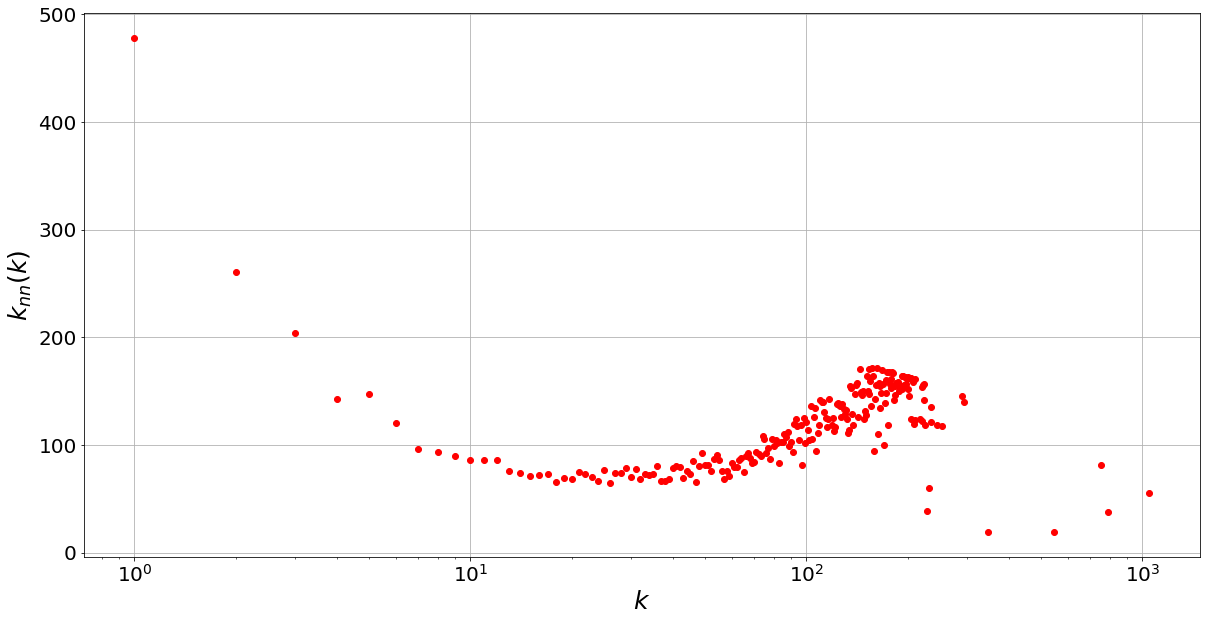

In [51]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(degree_knn, avg_degree_con, 'ro')
plt.rcParams.update({'font.size': 25})
#plt.xticks(range(0,1150,100))
#plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$k$', fontsize = 25)
plt.ylabel('$k_{nn}(k)$', fontsize = 25)
#plt.title('Degree correlation function as a function of $k$')
plt.savefig('knn_assortative.png')
plt.show()

The plot exhibited an approximately horizontal pattern. Therefore, such behaviour of the degree correlation function indicated a lack of degree correlations, which is in line with the value obtained for the Pearson correlation coefficient. Moreover, one may state to some extent that $k_{nn}(k)$ is independent of $k$. 

### Link Prediction 

Since I had an interest in Link Prediction techniques due to their close relation with Machine Learning I decided to explore this topic. Firstly, I started by exploring some simple metrics and tools related with Link Prediction. Thereafter, I tried implementing a Logistic Regression model to predict future links in the Facebook Network to which I had removed some of the existing links. Unfortunately, I ran into some computational obstacles that prevented me from finishing the model. Note that some of the functions below take a long time to run.

#### Jaccard Coefficient 

The most popular measures for link prediction analyze the “proximity” of nodes in a network. One way to measure proximity is to see what proportion of neighbors a pair of nodes share. This can be capture succintly with the Jaccard index.

$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|} $$

In the context of a network, we're comparing sets of neighbors:

$$ Jaccard = \frac{| \Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|} $$

where $ \Gamma(u) $ denotes the set of neighbors of $u$.

In [54]:
preds_jc = nx.jaccard_coefficient(fb)

In [55]:
pred_jc_dict = {}
for u, v, p in preds_jc:
    pred_jc_dict[(u,v)] = p

In [56]:
sorted(pred_jc_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[((11, 12), 1.0),
 ((11, 15), 1.0),
 ((11, 18), 1.0),
 ((11, 37), 1.0),
 ((11, 43), 1.0),
 ((11, 74), 1.0),
 ((11, 114), 1.0),
 ((11, 209), 1.0),
 ((11, 210), 1.0),
 ((11, 215), 1.0)]

This list represents the top 10 pairs of nodes that would most likely link together if the network would continue to add links at a posterior time.

#### Preferential Attachment 

The preferential attachement methods mirrors the “rich get richer” - nodes with more connections will be the ones to be more likely to get future connections.

Essentially, the measure is the product of a node pairs degrees:

$$  PA = |\Gamma(u)| \cdot |\Gamma(v)| $$

where $ \Gamma(u) $ denotes the set of neighbors of $u$.

In [57]:
preds_pa = nx.preferential_attachment(fb)

In [58]:
pred_pa_dict = {}
for u, v, p in preds_pa:
    pred_pa_dict[(u,v)] = p

In [59]:
sorted(pred_pa_dict.items(), key=lambda x:x[1], reverse=True)[:10]

[((107, 1912), 788975),
 ((1684, 1912), 597960),
 ((107, 3437), 571615),
 ((1684, 3437), 433224),
 ((1912, 3437), 412985),
 ((107, 2543), 307230),
 ((107, 2347), 304095),
 ((0, 1684), 274824),
 ((0, 1912), 261985),
 ((107, 2266), 244530)]

This list represents the top 10 pairs of nodes that would most likely link together if the network would continue to add links at a posterior time. It is interesting to note that the obtained results differ from those obtained with the Jaccard Coefficient. The preferential attachment method will benefit nodes with higher degree to link together which is what happened in this case as can be seen in the example below where the first pair corresponds to the first connection predicted by Preferential Attachment and the second the connections predicted by the Jaccard Coefficient.

In [61]:
print ("Degree of node 107: " + str(fb.degree(107)))
print("Degree of node 1912: " + str(fb.degree(1912)))
print("Degree of node 11: " + str(fb.degree(11)))
print("Degree of node 12: " + str(fb.degree(12)))

Degree of node 107: 1045
Degree of node 1912: 755
Degree of node 11: 1
Degree of node 12: 1


#### Common Neighbours 

In [62]:
# Targets are pairs of nodes that are not connected directly
# Links to be predicted
targets = nx.non_edges(fb)
common_neighbors = [(e[0], e[1],
                    len(list(nx.common_neighbors(fb, e[0], e[1]))))
                   for e in targets]


In [63]:
sorted(common_neighbors, key = lambda x: x[2], reverse = True)[0:10]

[(1917, 2233, 183),
 (1985, 2607, 182),
 (2088, 2369, 182),
 (1985, 2593, 176),
 (2233, 2414, 175),
 (2229, 2600, 171),
 (2323, 2369, 171),
 (1979, 2244, 169),
 (2104, 2324, 167),
 (2492, 2542, 167)]

This section is under construction. I was unable to import some of the required packages to run this code.

In [64]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Create a dataframe of all the nodes. Every row of this dataframe represents a link formed by the nodes in the columns ‘node_1’ and ‘node_2’, respectively:

In [65]:
#Every row of this dataframe represents a link formed by the nodes in the columns ‘node_1’ and ‘node_2’
node_list_1 = []
node_list_2 = []

for i in tqdm(fb.edges()):
  node_list_1.append(i[0])
  node_list_2.append(i[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|██████████| 88234/88234 [00:00<00:00, 994048.34it/s]


In [66]:
fb_df

,node_1,node_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4023,4034
88230,4023,4038
88231,4026,4030
88232,4027,4032


List of the unconnected pairs of the network. These node pairs will act as negative samples during the training of the link prediction model.

In [67]:
# combine all nodes in a list
node_list_pc = node_list_1 + node_list_2

# remove duplicate items from the list
node_list_p = list(dict.fromkeys(node_list_pc))

# build adjacency matrix
adj_fb = nx.to_numpy_matrix(fb, nodelist = node_list_p)

In [68]:
adj_fb.shape

(4039, 4039)

The function below takes approximately 1 hour to run.

In [70]:
get unconnected node-pairs
all_unconnected_pairs = []

traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_fb.shape[0])):
  for j in range(offset,adj_fb.shape[1]):
    if i != j:
      if nx.shortest_path_length(fb, source = i, target = j) <=2:
        if adj_fb[i,j] == 0:
          all_unconnected_pairs.append([node_list_p[i],node_list_p[j]])

  offset = offset + 1

Alternative method without computing the matrix. This also takes a very long time to run. List of the unconnected pairs of the network. These node pairs will act as negative samples during the training of the link prediction model.

In [71]:
# Returns the non-existent edges in the graph
non_edges = list(nx.non_edges(fb))

In [72]:
# remove duplicate items from the list
node_list = list(dict.fromkeys(non_edges))

In [73]:
unconnected_pairs = []

for i in node_list:
    if nx.shortest_path_length(fb, source = i[0], target = i[1]) <= 2:
        unconnected_pairs.append(i)

In [75]:
unconnected_pairs

In [76]:
node_1_unlinked = [i[0] for i in unconnected_pairs]
node_2_unlinked = [i[1] for i in unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

# saving the dataframe
data.to_csv('no_edges_data.csv', header = True, index = False)
data.to_csv('no_edges_data_no_header.csv', header = False, index = False)

In [77]:
data_no_edges = pd.read_csv("no_edges_data.csv")

In [78]:
len(data_no_edges)

1358067

We will randomly drop some of the edges from the graph. We have to make sure that in the process of dropping edges, all the nodes of the graph should remain connected. We will get a list of node pairs that can be dropped from the graph and all the nodes would still remain intact. This function takes 5 hours to run.

In [79]:
initial_node_count = len(fb.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):
  
  # remove a node pair and build a new graph
  G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
  if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
    omissible_links_index.append(i)
    fb_df_temp = fb_df_temp.drop(index = i)
    
# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1

fb_df_ghost.to_csv('fb_df_ghost.csv', header = True, index = False)
fb_df_ghost.to_csv('fb_df_ghost_no_header.csv', header = False, index = False)

We will append these removable edges to the dataframe of unconnected node pairs. Since these new edges are positive samples, they will have a target value of ‘1’:

In [80]:
data_removable = pd.read_csv('fb_df_ghost.csv')

In [81]:
len(data_removable)

84196

In [82]:
total = [data_no_edges, data_removable]

In [83]:
total_data = pd.concat(total)

In [84]:
total_data

,node_1,node_2,link
0,0,348,0
1,0,351,0
2,0,353,0
3,0,363,0
4,0,364,0
...,...,...,...
84191,4018,4023,1
84192,4019,4026,1
84193,4020,4027,1
84194,4020,4030,1


In [85]:
total_data['link'].value_counts()

0    1358067
1      84196
Name: link, dtype: int64

We will use the node2vec algorithm to extract node features from the graph after dropping the links. So, let’s first create a new graph after dropping the removable links:

In [86]:
# drop removable edges
fb_df_partial = fb_df.drop(index=data_removable.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

A few issues appeared when working with the Node2Vec package. Deleted the code from this Pyhton Notebook!

The idea would be to implement a Logistic Regression model on the data and compute the classification performance with the AUC-ROC score and then tune the parameters to improve the model.

Future work would involve testing link prediction methods such as (Variational) Graph Auto-Encoders, Node2Vec, Spectral Clustering and Baseline Indexes (Adamic Adar, Jaccard Coefficient, Preferential Attachment).